# Project 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from random import random, seed

In [4]:
from RegLib.RegressionMethod import RegressionMethod, RegressionType
from RegLib.SamplingMethod import SamplingMethod
from RegLib.HelperFunctions import *
#from RegLib.BootstrapSampling import BootstrapSampling
#from CrossValidationKFold import CrossValidationKFold

In [6]:
seed = 2018
np.random.seed(seed)
# Make data.
x0 = np.arange(0, 1, 0.05)
y0 = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x0,y0)

z = FrankeFunction(x, y)

In [5]:
# x0, y0, z0 = create_frankie_data(seed, N = N, noise_strength=0.0)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x0, y0, z0, c='skyblue', s=5)
# ax.scatter(x, y, z, c='red', s=5)
# #ax.view_init(30, 185)
# plt.show()

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Fix your x and y values, they should span the whole room. Using linspace and mesh
- [ ] Add confidence intervals for beta by computing variance for each beta

In [75]:
x_mesh, y_mesh, z = create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif')
p = 2
X = create_X(x_mesh, y_mesh, p)

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ValueError: too many values to unpack (expected 3)

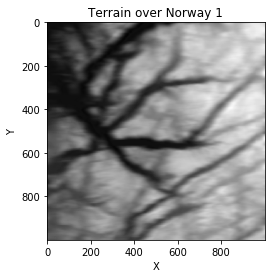

In [44]:


#plot_3d_graph(x_mesh, y_mesh, z, "Norway Terrain Data", "Elevation of terrain", dpi=150, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
#plot_3d_graph(x_mesh, y_mesh, smoothed_z, "Norway Terrain Data Smoothed (Savgol filter)", "Elevation of terrain", dpi=100, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(smoothed_z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
from scipy.signal import savgol_filter
def create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif'):
    terrain = imread(path)
    terrain = terrain[:N,:N]
    # Creates mesh of image pixels
    x = np.linspace(0,1, np.shape(terrain)[0])
    y = np.linspace(0,1, np.shape(terrain)[1])
    x_mesh, y_mesh = np.meshgrid(x,y)

    predictors_input = np.c_[x_mesh.ravel(), y_mesh.ravel()]
    terrain = savgol_filter(terrain, 77, 2)
    z = terrain.ravel()

    return x_mesh, y_mesh, z

x, y, z= create_terrain_data()
print(x.shape, y.shape, z.shape, pred.shape)

(1000, 1000) (1000, 1000) (1000000,) (1000000, 2)


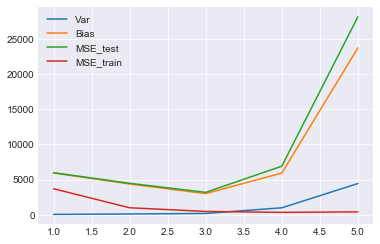

In [36]:
N = 100
p = 5
trials = 100
sample_count = N
polydegree = np.zeros(p); r2_boot = np.zeros(p); mse_boot = np.zeros(p); bias_boot = np.zeros(p); var_boot = np.zeros(p)

r2_boot_train = np.zeros(p); mse_boot_train = np.zeros(p); bias_boot_train = np.zeros(p); var_boot_train = np.zeros(p)
x, y, z = create_terrain_data(N = N, path = 'DataFiles/SRTM_data_Norway_2.tif')

for degree in range(p):
    polydegree[degree] = degree + 1

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(trials, sample_count).train_and_test(X, z, RegressionType.OLS)
    
    r2_boot[degree] = boot.r2; mse_boot[degree] = boot.mse; bias_boot[degree] = boot.bias; var_boot[degree] = boot.var; 
    r2_boot_train[degree] = boot.r2_train; mse_boot_train[degree] = boot.mse_train; bias_boot_train[degree] = boot.bias_train; var_boot_train[degree] = boot.var_train;

values_to_plot = {
    "Var": var_boot,
    "Bias": bias_boot,
    "MSE_test": mse_boot,
    "MSE_train": mse_boot_train,
}

plot_test_train(polydegree, values_to_plot) 

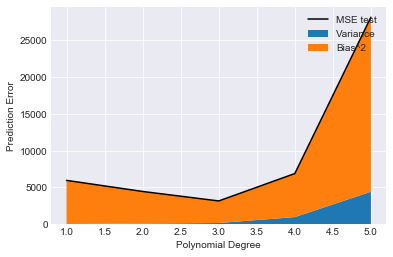

In [37]:
values_to_plot = {
    "variance": var_boot,
    "mse": mse_boot,
    "bias": bias_boot,
}

plot_bias_variance_analysis(polydegree, values_to_plot)